In [175]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [180]:
# Step 2: Data Loading and Preprocessing
# Load the dataset
data = pd.read_csv("housing.csv")

# Drop rows with missing values
data.dropna(inplace=True)

# Split features and target variable
X = data.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = data['median_house_value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


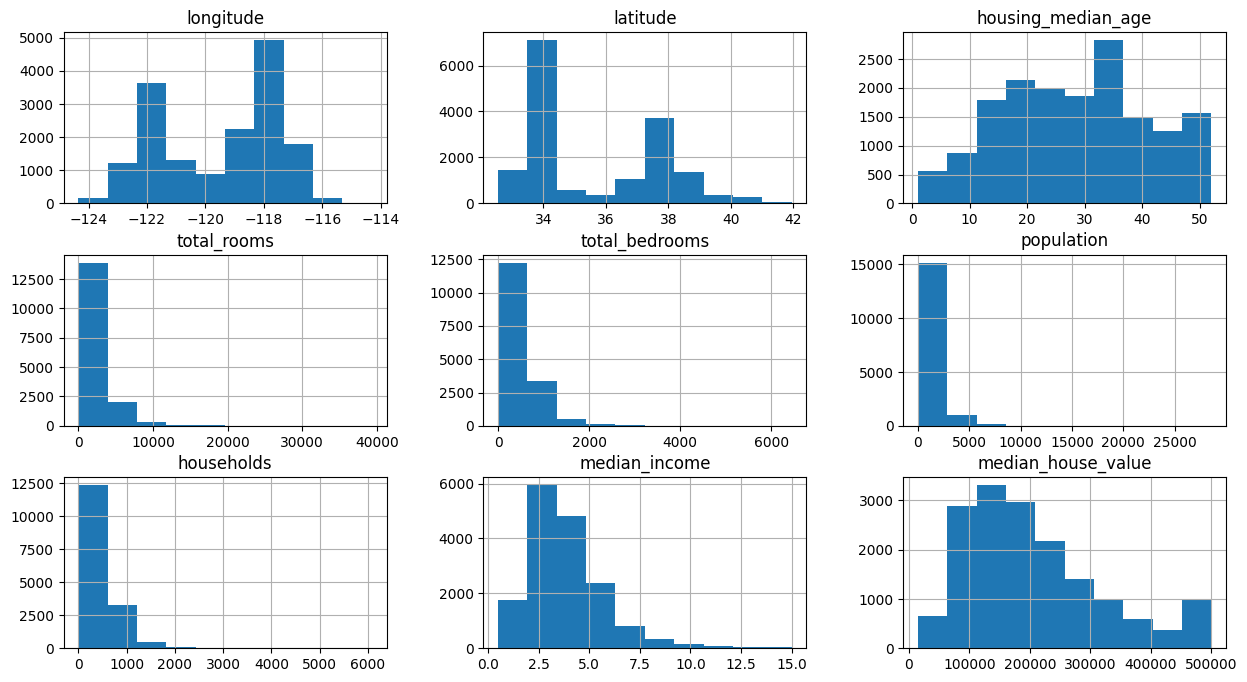

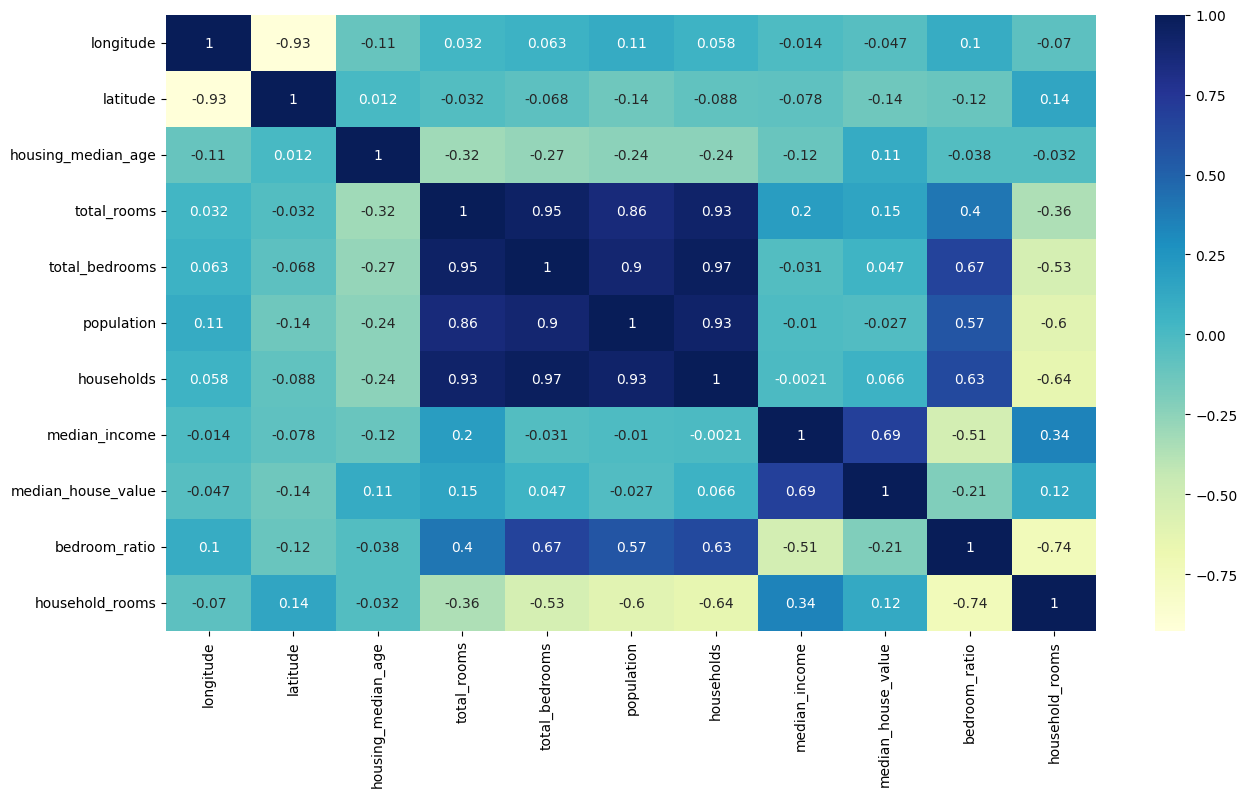

In [189]:
# Step 3: Feature Engineering
# Join X_train and y_train for visualization
train_data = X_train.join(y_train)

# Visualize the histograms of features
train_data.hist(figsize=(15, 8))


# Log transform certain features
features_to_log = ['total_rooms', 'total_bedrooms', 'population', 'households']
for feature in features_to_log:
    train_data[feature] = np.log(train_data[feature] + 1)

# Create new features
train_data["bedroom_ratio"] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

# Plotting a heatmap to visualise feature correlations
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

plt.show()

In [182]:
# Step 4: Data Scaling
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_s = scaler.fit_transform(train_data.drop(['median_house_value'], axis=1))

In [183]:
# Step 5: Model Training and Evaluation
# Initialize Linear Regression model
reg = LinearRegression()

# Fit the model
reg.fit(X_train_s, y_train)

LinearRegression()

In [184]:
# Step 6: Model Evaluation
# Join X_test and y_test for evaluation
test_data = X_test.join(y_test)

# Log transform certain features
for feature in features_to_log:
    test_data[feature] = np.log(test_data[feature] + 1)

# Check if 'ocean_proximity' column exists before one-hot encoding
if 'ocean_proximity' in test_data.columns:
    # One-hot encode categorical variable and drop the original column
    test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# Create new features for the test data
test_data["bedroom_ratio"] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# Split the test data into features and target variable
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

# Scale the test data
X_test_s = scaler.transform(X_test)

# Evaluate the Linear Regression model
reg_score = reg.score(X_test_s, y_test)

In [185]:
# Step 7: Model Training and Evaluation (Random Forest)
# Initialize Random Forest Regressor
forest = RandomForestRegressor()

# Fit the Random Forest model
forest.fit(X_train_s, y_train)

# Evaluate the Random Forest model
forest_score = forest.score(X_test_s, y_test)

In [186]:
# Step 8: Hyperparameter Tuning (Random Forest)
# Define parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_s, y_train)

# Get the best estimator and evaluate it
best_forest = grid_search.best_estimator_
best_forest_score = best_forest.score(X_test_s, y_test)

In [187]:
# Step 9: Print or display results
print("Linear Regression Score:", reg_score)
print("Random Forest Score:", forest_score)
print("Best Random Forest Score:", best_forest_score)

Linear Regression Score: 0.6693800501158647
Random Forest Score: 0.8034881134889449
Best Random Forest Score: 0.8042668027628228
